In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
#from google.colab import drive
#drive.mount('/content/drive')

In [184]:
df = pd.read_csv('resdata.csv')

In [185]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [187]:
df.shape

(962, 2)

# Exploring Categories

In [188]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

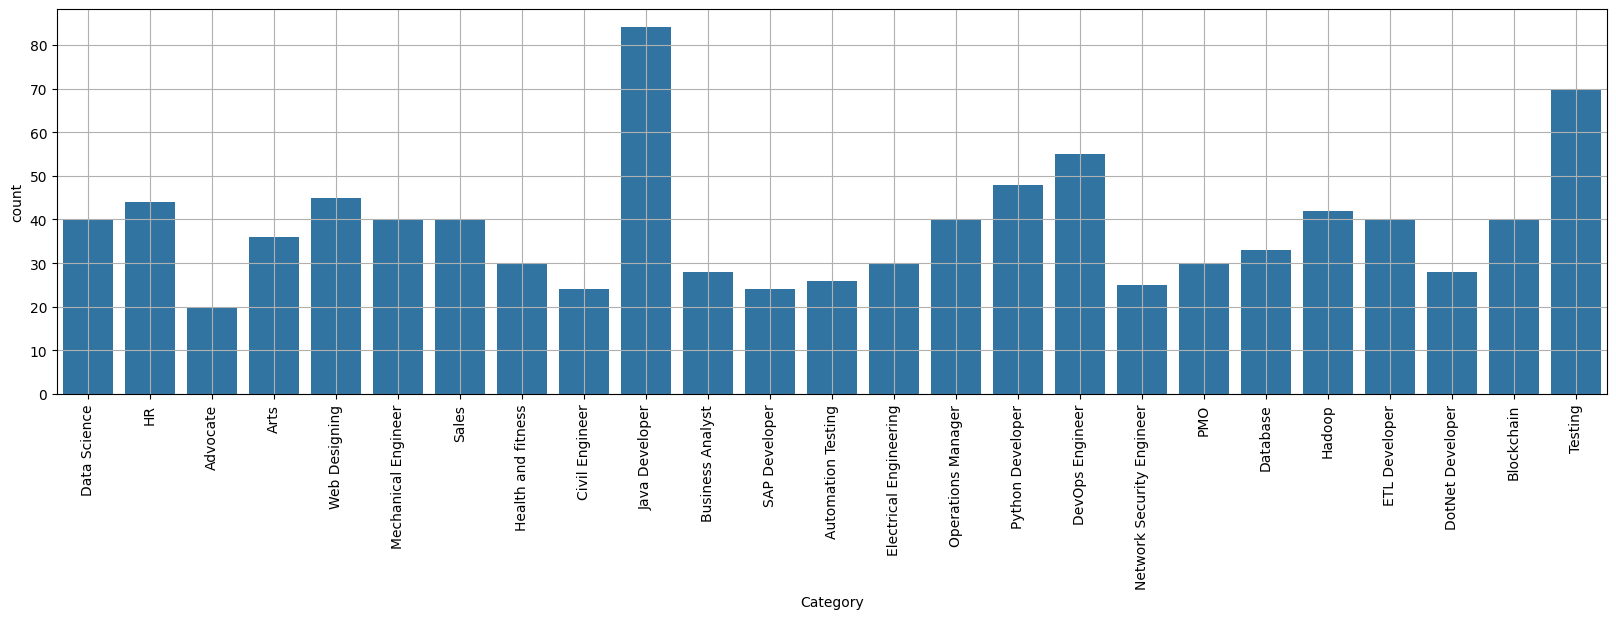

In [189]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x='Category',data=df)
plt.grid()

# Cleaning Data

In [190]:
df.duplicated(subset=['Resume']).value_counts()

True     796
False    166
Name: count, dtype: int64

In [191]:
df[df.duplicated()==True]

,Category,Resume
10,Data Science,Skills * Programming Languages: Python (pandas...
11,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
12,Data Science,"Areas of Interest Deep Learning, Control Syste..."
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [192]:
df.iloc[19]['Resume']

'Expertise â\x88\x92 Data and Quantitative Analysis â\x88\x92 Decision Analytics â\x88\x92 Predictive Modeling â\x88\x92 Data-Driven Personalization â\x88\x92 KPI Dashboards â\x88\x92 Big Data Queries and Interpretation â\x88\x92 Data Mining and Visualization Tools â\x88\x92 Machine Learning Algorithms â\x88\x92 Business Intelligence (BI) â\x88\x92 Research, Reports and Forecasts Education Details \r\n PGP in Data Science  Mumbai, Maharashtra Aegis School of data science & Business\r\n B.E. in Electronics & Communication Electronics & Communication Indore, Madhya Pradesh IES IPS Academy\r\nData Scientist \r\n\r\nData Scientist with PR Canada\r\nSkill Details \r\nAlgorithms- Exprience - 6 months\r\nBI- Exprience - 6 months\r\nBusiness Intelligence- Exprience - 6 months\r\nMachine Learning- Exprience - 24 months\r\nVisualization- Exprience - 24 months\r\nspark- Exprience - 24 months\r\npython- Exprience - 36 months\r\ntableau- Exprience - 36 months\r\nData Analysis- Exprience - 24 months

In [193]:
df.drop_duplicates(subset=['Resume'], keep='first',inplace = True)
df.reset_index(inplace=True,drop=True)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  166 non-null    object
 1   Resume    166 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [195]:
import re
def clean_resume(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)
    resume_text = re.sub('RT|cc', ' ', resume_text)
    resume_text = re.sub('#\S+', '', resume_text)
    resume_text = re.sub('@\S+', ' ', resume_text)
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)
    resume_text = re.sub(r'[^\x00-\x7f]', r' ', resume_text)
    resume_text = re.sub('\s+', ' ', resume_text)
    return resume_text

df['Resume'] = df['Resume'].apply(clean_resume)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asus\AppData\Local\Temp\ipykernel_18364\3797569475.py:3: SyntaxWarning: invalid escape sequence '\S'
  resume_text = re.sub('http\S+\s*', ' ', resume_text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18364\3797569475.py:5: SyntaxWarning: invalid escape sequence '\S'
  resume_text = re.sub('#\S+', '', resume_text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18364\3797569475.py:6: SyntaxWarning: invalid escape sequence '\S'
  resume_text = re.sub('@\S+', ' ', resume_text)
C:\Users\Asus\AppD

In [196]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [197]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')  # Add this line

nltk.download('punkt_tab')

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""

def clean_resume(resume_text):

    words = nltk.word_tokenize(resume_text)
    cleaned_words = [word for word in words if word not in oneSetOfStopWords and word not in string.punctuation]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text


for records in Sentences:
    cleanedText = clean_resume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)


wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


# Words into Categorical Values

In [198]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [199]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


# vectorization and train test split

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


Feature completed .....
(132, 7351)
(34, 7351)


In [201]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format
(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format
(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.89
Accuracy of KNeighbors Classifier on test set:     0.82


# Classification reports

In [202]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train, clf.predict(X_train))))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.40      0.57         5
           2       0.71      0.83      0.77         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       0.90      1.00      0.95         9
           8       1.00      0.17      0.29         6
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         4
          11       0.67      1.00      0.80         4
          12       1.00      0.75      0.86         8
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       0.91      1.00      0.

In [203]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.

c:\Users\Asus\Desktop\project_ResumeAnalyser\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\Desktop\project_ResumeAnalyser\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\Desktop\project_ResumeAnalyser\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

# Ats Scorer

In [204]:

def clean_resume(resume_text):
    words = nltk.word_tokenize(resume_text)
    cleaned_words = [word for word in words if word not in oneSetOfStopWords and word not in string.punctuation]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text


all_cleaned_resumes = [clean_resume(resume) for resume in df['Resume']]


In [205]:
import string
from collections import Counter
all_words = []
for resume in all_cleaned_resumes:
    all_words.extend(resume.split())

word_counts = Counter(all_words)


In [206]:

frequency_threshold = 10

potential_keywords = [word for word, count in word_counts.items() if count >= frequency_threshold]

In [207]:

potential_keywords = [word for word in potential_keywords if word not in ['work', 'experience', 'skills']]
potential_keywords.extend(['Python', 'SQL', 'machine learning', 'data analysis','operating system','node.js','mongodb','express'])
print("Potential ATS Keywords:", potential_keywords)

Potential ATS Keywords: ['Skills', 'Programming', 'Languages', 'Python', 'learn', 'Java', 'JavaScript', 'JQuery', 'Machine', 'learning', 'Regression', 'techniques', 'Cluster', 'Analysis', 'Word', 'Language', 'processing', 'Neural', 'Database', 'Mysql', 'js', 'Tableau', 'HTML', 'CSS', 'Angular', '6', 'computer', 'understanding', 'Deep', 'Education', 'Details', 'Data', 'Science', 'Skill', 'Exprience', '24', 'months', 'monthsCompany', 'company', 'description', 'Services', 'Technology', 'Review', 'review', 'process', 'run', 'analytics', 'generate', 'reports', 'Core', 'member', 'team', 'developing', 'automated', 'platform', 'tool', 'E', 'reviews', 'time', 'end', 'flow', 'solution', 'research', 'development', 'models', 'analysis', 'information', 'present', 'text', 'data', 'Worked', 'analyzing', 'monitoring', 'entire', 'following', 'standards', 'Developed', 'order', 'identify', 'related', 'issues', 'Tools', 'Technologies', 'reporting', 'AND', 'USA', 'customer', 'one', 'year', 'Performed', 'co

In [208]:
ats_keywords = potential_keywords


# Prediction


In [209]:
new_resume_data = df.iloc[19]['Resume']

In [210]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
import pickle
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    from sklearn.feature_extraction.text import TfidfVectorizer


# Assuming `requiredText` contains the text data (from your `df['Resume']` column)
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english'
)
word_vectorizer.fit(requiredText)

# Save the vectorizer to a file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(word_vectorizer, file)
    from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize and fit the label encoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Save the label encoder to a file
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

# Now continue with training as usual

# Load the label encoder (used during training)




def predict_ats_score_and_category(resume_text):
    # Clean the resume text
    cleaned_resume = clean_resume(resume_text)

    # Calculate ATS score: count unique keywords present in the resume
    ats_score = len(set(ats_keywords).intersection(cleaned_resume.lower().split()))

    # Transform the resume text into features
    resume_features = word_vectorizer.transform([resume_text])

    # Predict category
    predicted_category_index = loaded_model.predict(resume_features)[0]
    predicted_category = le.inverse_transform([predicted_category_index])[0]

    return ats_score, predicted_category



new_resume_data = df.iloc[19]['Resume']
ats_score, predicted_category = predict_ats_score_and_category(new_resume_data)
print("Predicted ATS Score:", ats_score)
print("Predicted Category:", predicted_category)

Predicted ATS Score: 30
Predicted Category: Automation Testing
